# Salary Predictor using Linear Regression

## Model Building

#### Importing necessary libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Loading the dataset

In [134]:
try: 
    data = pd.read_csv("Salary.csv")
except FileNotFoundError:
    data = pd.read_csv("https://raw.githubusercontent.com/Vishal-Singh27/Salary-Predictor/refs/heads/main/Salary.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 692.0 bytes


#### Data cleaning and feature engineering

In [135]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [136]:
X = [] # Feature
for x in data["YearsExperience"]:
    X.append([x])
X = np.array(X)

y = np.array(data["Salary"]) # Target

In [ ]:
X

[[1.1],
 [1.3],
 [1.5],
 [2.0],
 [2.2],
 [2.9],
 [3.0],
 [3.2],
 [3.2],
 [3.7],
 [3.9],
 [4.0],
 [4.0],
 [4.1],
 [4.5],
 [4.9],
 [5.1],
 [5.3],
 [5.9],
 [6.0],
 [6.8],
 [7.1],
 [7.9],
 [8.2],
 [8.7],
 [9.0],
 [9.5],
 [9.6],
 [10.3],
 [10.5],
 [11.2],
 [11.5],
 [12.3],
 [12.9],
 [13.5]]

#### Cleaning the data

### Making the model

#### Making the predictor function

In [114]:
def f_x(X, W=0, b=0):
    """
        f(x) = wx + b
    """
    return np.dot(W, X) + b

#### Making the cost function

In [8]:
def J(X, y, W, b):
    """
        m: no. of training examples
        J(x, y) = ∑((y_hat - y)^2) / 2m
    """
    m = len(y)
    cost = 0
    for i in range(m):
        cost += ((f_x(X[i], W, b) - y[i]) ** 2)
    cost /= (2 * m)
    return cost

#### Making gradient descent function

In [81]:
def gradient_descent(X, y, W=None, b=0, alpha=0.0001, iterations=10000):
    m = len(X)
    W = 0
    
    for iteration in range(1, iterations + 1):
        if iteration % 1000 == 0:
            print(f"Iteration: {iteration} | W: {W} | b: {b}")

        dJ_w, dJ_b = 0, 0
        for i in range(m):
            fx = f_x(X[i], W, b)
            dJ_w += (fx - y[i]) * X[i]
            dJ_b += (fx - y[i])
        dJ_w, dJ_b = dJ_w / m, dJ_b / m

        W -= alpha * dJ_w
        b -= alpha * dJ_b
    return W, b


### Multiple Linear Regression Gradient Descent

In [137]:
def gradient_decent(X, y, w, b, alpha=0.001, iterations=10000):
    m = len(y)
    n = len(X[0])
    for iteration in range(1, iterations + 1):
        if iteration % 1000 == 0:
            print(f"Iteration: {iteration} | w: {w} | b: {b}")

        d_J_w, d_J_b = np.zeros((n, )), 0
        
        for i in range(m):
            fx = f_x(X[i], w, b)
            for j in range(n):
                d_J_w[j] += (fx - y[i]) * X[i][j]
            d_J_b += (fx - y[i])

        d_J_w = d_J_w / m
        d_J_b = d_J_b / m

        w -= (alpha * d_J_w)
        b -= (alpha * d_J_b)
    return w, b

In [131]:
X = np.array([
    [2104, 3],
    [1600, 3],
    [2400, 3],
    [1416, 2],
    [3000, 4],
    [1985, 4],
    [1534, 3],
    [1421, 2],
    [852, 2],
    [1850, 3]
])

y = np.array([
    400000,
    330000,
    369000,
    232000,
    540000,
    299900,
    314900,
    198999,
    178000,
    249000
])

In [125]:
X = np.c_[X[:],X[:, 0] ** 2]

array([[ 5.],
       [ 3.],
       [15.],
       ...,
       [ 4.],
       [14.],
       [ 1.]], shape=(6704, 1))

In [155]:
mean = X.mean(axis=0)
std = X.std(axis=0)
X_normalized = np.zeros((X.shape))

# Z score normalization
for i in range(len(X)):
    for j in range(len(X[i])):
        X_normalized[i][j] = (X[i][j] - mean[j]) / std[j]
X_normalized

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]], shape=(6704, 1))

In [183]:
w, b = gradient_decent(X, y, np.full(len(X[0]), 1.0), 0, alpha=1e-03, iterations=30000)
print("w: ", w, "b: ", b)

Iteration: 1000 | w: [7403.76313745] | b: 30573.395410796013
Iteration: 2000 | w: [5744.72592739] | b: 51452.47179000652
Iteration: 3000 | w: [4583.60455707] | b: 66065.24938745561
Iteration: 4000 | w: [3770.9628463] | b: 76292.39091585802
Iteration: 5000 | w: [3202.213905] | b: 83450.12825528272
Iteration: 6000 | w: [2804.15981309] | b: 88459.66133722084
Iteration: 7000 | w: [2525.57105701] | b: 91965.71646455929
Iteration: 8000 | w: [2330.59329746] | b: 94419.52250893074
Iteration: 9000 | w: [2194.13292033] | b: 96136.88401201784
Iteration: 10000 | w: [2098.62749157] | b: 97338.82519194587
Iteration: 11000 | w: [2031.78547401] | b: 98180.03573347101
Iteration: 12000 | w: [1985.00430807] | b: 98768.77933173552
Iteration: 13000 | w: [1952.26326335] | b: 99180.82721676219
Iteration: 14000 | w: [1929.34857133] | b: 99469.20990161058
Iteration: 15000 | w: [1913.31111392] | b: 99671.04220300696
Iteration: 16000 | w: [1902.08687228] | b: 99812.29991377566
Iteration: 17000 | w: [1894.2312878

In [1]:
w, b = gradient_decent(X, y, [[0], [0], [0]], 0)

NameError: name 'gradient_decent' is not defined

#### Training the model on the data

### Testing the model

#### Visualizing the predictions

In [66]:
f_x(X[1], w, b)

np.float64(20.000000000000004)

In [55]:
y

array([[400000],
       [330000],
       [369000],
       [232000],
       [540000],
       [299900],
       [314900],
       [198999],
       [178000],
       [249000]])

In [61]:
for i in range(len(y)):
    print(X_normalized[i, 0], y[i])

0.5066246939055499 400000
-0.380584638020778 330000
1.027684142814663 369000
-0.7044864576129295 232000
2.0838857284412438 540000
0.29714471275627796 299900
-0.4967668124397019 314900
-0.695684777732708 198999
-1.6973159481019153 178000
0.059499355990297306 249000


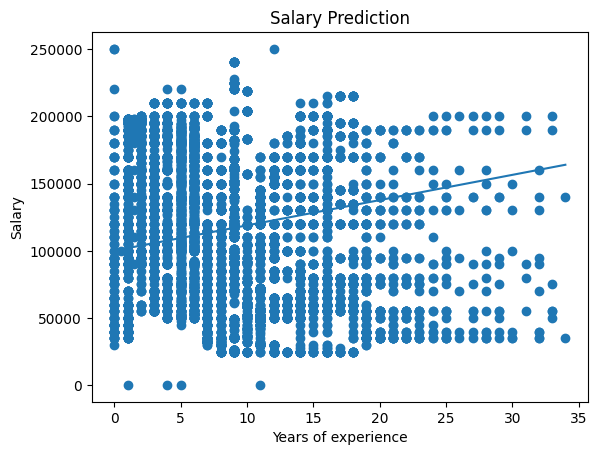

In [184]:
yhat = list()
for x in X:
    yhat.append(f_x(x, w, b))

predictions = []
for i in range(len(y)):
    predictions.append([X[i, 0], yhat[i]])
predictions.sort(key=lambda x:x[0])
predictions = np.array(predictions)

plt.scatter(predictions[:, 0], y)
plt.plot(predictions[:, 0], predictions[:, 1])
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.title("Salary Prediction")
plt.show()


### Trying out Salary_Data.csv

In [194]:
try: 
    data = pd.read_csv("Salary_Data.csv")
except FileNotFoundError:
    data = pd.read_csv("https://raw.githubusercontent.com/Vishal-Singh27/Salary-Predictor/refs/heads/main/Salary.csv")
data.info()
li = list()
for dataa in data.values:
    if dataa[4] == 0:
        li.append(dataa)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [199]:
li = np.array(li)
li[:, 5].mean()

np.float64(29680.233333333334)

In [178]:
x = data["Years of Experience"]
y = data["Salary"]

x = x[~x.isna()]
y = y[~y.isna()]

In [179]:
X = []
for x_ in x:
    X.append([x_])
X = np.array(X)
y = np.array(y)

In [181]:
w, b = gradient_decent(X, y, np.full(len(X[0]), 0.0), 0, 1e-02, 10000)

Iteration: 1000 | w: [2098.06544542] | b: 97345.89857418202
Iteration: 2000 | w: [1882.1407039] | b: 100063.32356206451
Iteration: 3000 | w: [1876.08697467] | b: 100139.51008415125
Iteration: 4000 | w: [1875.91725054] | b: 100141.64607177688
Iteration: 5000 | w: [1875.91249211] | b: 100141.70595695094
Iteration: 6000 | w: [1875.9123587] | b: 100141.70763590912
Iteration: 7000 | w: [1875.91235496] | b: 100141.70768298097
Iteration: 8000 | w: [1875.91235485] | b: 100141.70768430026
Iteration: 9000 | w: [1875.91235485] | b: 100141.70768433747
Iteration: 10000 | w: [1875.91235485] | b: 100141.70768433747
